# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

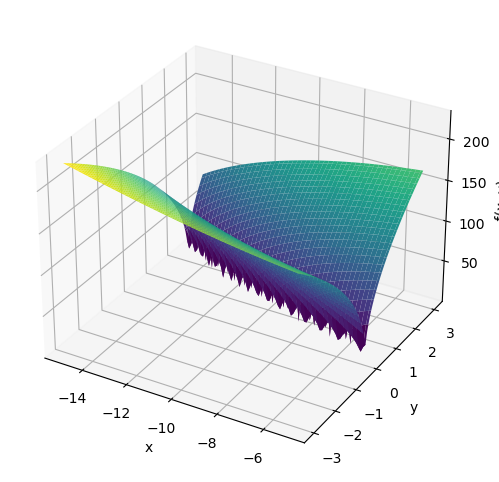

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def bukin(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x**2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

# Define the range of x and y values
x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the value of the Bukin function at each point in the grid
Z = bukin(X, Y)

# Plot the Bukin function as a 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [5]:
import numpy as np

def bukin(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x**2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

def neighbour(state, step=0.1):
    x, y = state
    dx = np.random.uniform(-step, step)
    dy = np.random.uniform(-step, step)
    return (x+dx, y+dy)

def hill_climbing(start_state, max_iter=1000, threshold=1e-6):
    current_state = start_state
    current_value = bukin(*current_state)
    for i in range(max_iter):
        next_state = neighbour(current_state)
        next_value = bukin(*next_state)
        if next_value < current_value:  # find the minimum
            current_state = next_state
            current_value = next_value
        elif abs(next_value - current_value) < threshold:
            break
    return current_state, current_value

start_state = (-10, 0)
min_state, min_value = hill_climbing(start_state)
print(f"Minimum found at {min_state} with a value of {min_value}")

Minimum found at (-9.716092387397556, 0.9436132665457222) with a value of 2.030759830803681


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [14]:
import numpy as np

# find the subset of items with the maximum total value that can fit into a knapsack with a given capacity
def knapsack(items, capacity):
    n = len(items)
    values = [item[0] for item in items]
    weights = [item[1] for item in items]
    
    def evaluate(solution):
        total_value = np.dot(values, solution)
        total_weight = np.dot(weights, solution)
        if total_weight <= capacity:
            return total_value
        else:
            return 0
    
    def neighbour(solution):
        i = np.random.randint(n)
        new_solution = solution.copy()
        new_solution[i] = 1 - new_solution[i]
        return new_solution
    
    current_solution = np.zeros(n)
    current_value = evaluate(current_solution)
    while True:
        next_solution = neighbour(current_solution)
        next_value = evaluate(next_solution)
        if next_value > current_value:
            current_solution = next_solution
            current_value = next_value
        else:
            break
    
    return current_solution.astype(int), current_value

items = [(1, 2), (3, 4), (5, 7), (2, 3), (4, 5)]
capacity = 10
solution, value = knapsack(items, capacity)
print(f"Solution: {solution}, Max value: {value}")

Solution: [0 0 0 0 1], Max value: 4.0



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [13]:
import numpy as np

#  Simulated Annealing algorithm for the Knapsack problem to find the subset of items 
# with the maximum total value that can fit into a knapsack with a given capacity
# In Simulated Annealing, the search process starts with an initial solution 
# and iteratively generates neighbouring solutions by making small random changes to the current solution
def knapsack(items, capacity, max_iter=1000, threshold=1e-6, start_temp=100, end_temp=0.1, cooling_factor=0.95):
    n = len(items)
    values = [item[0] for item in items]
    weights = [item[1] for item in items]
    
    def evaluate(solution):
        total_value = np.dot(values, solution) # dot product between two arrays values and solution 
        total_weight = np.dot(weights, solution)
        if total_weight <= capacity:
            return total_value
        else:
            return 0
    
    def neighbour(solution):
        i = np.random.randint(n)
        new_solution = solution.copy()
        new_solution[i] = 1 - new_solution[i]
        return new_solution
    
    # the probability of accepting a worse solution based on the temperature 
    # and the difference in value between the current and next solutions
    def acceptance_probability(delta, temperature):
        if delta > 0:
            return np.exp(-delta / temperature)
        else:
            return 1
        
    best_solution = np.zeros(n).astype(int)
    best_value = 0
    
    current_temp = start_temp
    while current_temp > end_temp:
        current_solution = np.random.randint(2, size=n)
        current_value = evaluate(current_solution)
        for i in range(max_iter):
            next_solution = neighbour(current_solution)
            next_value = evaluate(next_solution)
            delta = next_value - current_value
            if delta > 0 or acceptance_probability(delta, current_temp) > np.random.uniform():
                current_solution = next_solution
                current_value = next_value
                if current_value > best_value:
                    best_solution = current_solution
                    best_value = current_value
            if abs(delta) < threshold:
                break
        current_temp *= cooling_factor
    
    return best_solution, best_value


items = [(1, 2), (3, 4), (5, 7), (2, 3), (4, 5)]
capacity = 10
solution, value = knapsack(items, capacity, max_iter=1000, threshold=1e-6, start_temp=100, end_temp=0.1, cooling_factor=0.95)
print(f"Solution: {solution}, Max value: {value}")

Solution: [0 0 1 1 0], Max value: 7
